# Codeclause Internship

**Vedant Modak (DataScience intern)**

# Stock Market Prediction 

Stock market prediction withLinear regression

**A.) Importing necssary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [ ]:
df=pd.read_csv('/content/tesla.csv')

**B.) Overviewing the data**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2192,15-03-2019,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


In [ ]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
836,23-10-2013,168.910004,171.809998,160.149994,164.500000,164.500000,13320400
419,27-02-2012,33.410000,34.000000,33.000000,33.619999,33.619999,606000
1342,27-10-2015,214.839996,217.100006,207.509995,210.350006,210.350006,3519400
1524,19-07-2016,225.000000,229.100006,224.750000,225.259995,225.259995,3115100
2066,12-09-2018,281.440002,292.500000,278.649994,290.540009,290.540009,10015400
1040,15-08-2014,261.480011,262.089996,258.500000,262.010010,262.010010,3867900
323,07-10-2011,26.980000,27.600000,26.049999,26.990000,26.990000,1311600
664,19-02-2013,37.360001,39.290001,37.310001,39.279999,39.279999,2701400
1881,15-12-2017,342.040009,343.899994,335.760010,343.450012,343.450012,6933200
371,15-12-2011,28.670000,29.170000,28.120001,28.620001,28.620001,700300


**C.) Adding new columns**

In [ ]:
df['Tomorrow']=df["Close"].shift(-1)

In [ ]:
df['Target']=(df["Tomorrow"]>df["Close"]).astype(int)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,23.830000,0
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,21.959999,0
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,19.200001,0
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,16.110001,0
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,15.800000,0
...,...,...,...,...,...,...,...,...,...
2187,08-03-2019,276.910004,285.589996,275.890015,284.140015,284.140015,8819600,290.920013,1
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300,283.359985,0
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100,288.959991,1
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700,289.959991,1


**D.) Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train=df.iloc[:-100]
test=df.iloc[-100:]

predictors=["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

**E.) Measuring the accuracy of the model**

In [ ]:
from sklearn.metrics import precision_score

preds=model.predict(test[predictors])

In [ ]:
preds=pd.Series(preds, index=test.index)

In [ ]:
preds

2092    1
2093    0
2094    1
2095    1
2096    1
       ..
2187    0
2188    0
2189    0
2190    0
2191    1
Length: 100, dtype: int64

**Checking the precision of the model**

In [ ]:
precision_score(test["Target"],preds)

0.4878048780487805

In [ ]:
combined=pd.concat([test["Target"],preds],  axis=1)

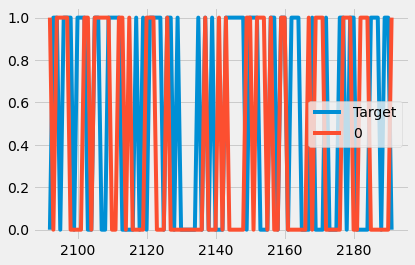

In [ ]:
combined.plot()